# Olympic Medal Prediction Model

### Step 1: Form a Hypothesis
- A statement that one can prove or disprove using data

> Predict how many medals a country will win in the Olympics.

### Step 2: Find the Data
- Check the Excel file and import it

In [44]:
import pandas as pd

In [45]:
teams = pd.read_csv("teams.csv")

In [46]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


### Step 3: Reshape the Data
- Organize the data

Remove some columns to make the model simpler.

In [47]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [48]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


Check for linear correlations to see which columns can predict the medals column. Pearson correlation coefficient formula

In [49]:
teams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

Plot the data onto a graph using the athletes column.

The graph below shows that there is a relationship as the number of athletes increases, the number of medals increase.

In [50]:
import seaborn as sns

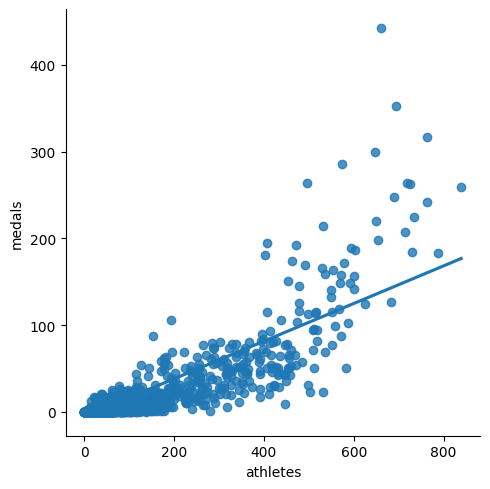

In [51]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

Plot the data onto a graph using the age column. The graph below shows that there is no linear relationship.

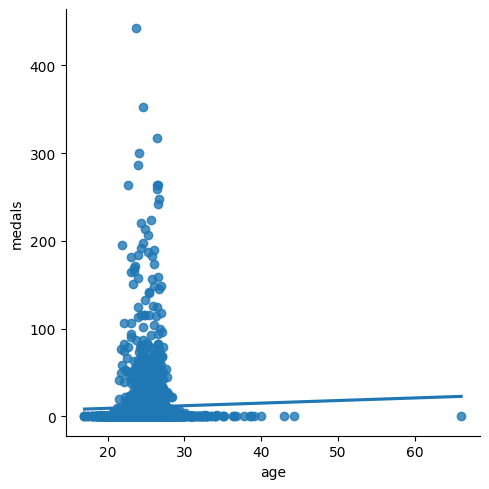

In [52]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

Visualize how many countries fall into each bin for number of medals they earned using a historgram.

The histogram below is unbalanced which may impact the usefulness and accuracy of the model.

<Axes: ylabel='Frequency'>

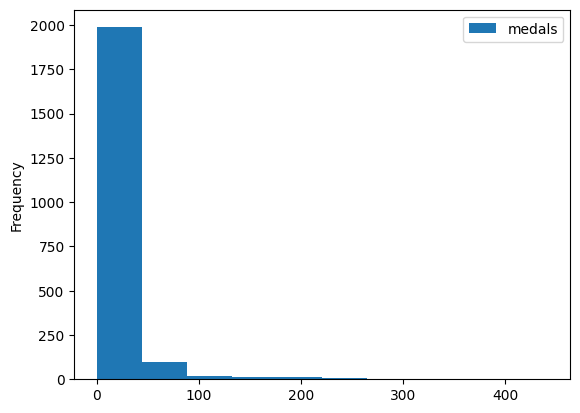

In [53]:
teams.plot.hist(y="medals")

### Step 4: Clean the Data
- Remove missing values so the data is ready for machine learning

Find rows that have missing values.

In [54]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


Remove any rows that have missing values.

In [55]:
teams = teams.dropna()

In [56]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


### Step 5: Split the Data
- Make predictions on another part of the data that the algorithm hasn't been trained on
- Train the algorithm on the training data
- Test the algorithm on the testing data to see how well the algorithm makes predictions (mean absolute error)

Split the data because the data is time series data meaning some rows come before other rows.

Take the last two years of data and put them in the test data set, then take the previous years and put them in the train data set.

This makes sure the model doesn't use future data to predict the past.

The model will be trained on the train data set and evaluated how well it's doing on the test data set.

In [57]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

The train data set has 1609 rows and the test data set has 405 rows. This is about a 80/20 split of the data.

In [58]:
train.shape

(1609, 7)

In [59]:
test.shape

(405, 7)

### Step 6: Train the Model


Use linear regression to make predictions using the athletes and prev_medals column to predict the medals column.

In [60]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [61]:
predictors = ["athletes", "prev_medals"]
target = "medals"

Use the fit method to learn the train data set.

Pass in the predictors and medals columns in the train data set to train the algorithm. Equation of a line formula

In [62]:
reg.fit(train[predictors], train["medals"])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Use the predict method on the linear regression class.

Pass in the predictors columns in the test data set so the algorithm creates prediction without knowing the actual results.

In [63]:
predictions = reg.predict(test[predictors])

Assign predictions to the test data set.

In [64]:
test["predictions"] = predictions

In [65]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


Index the test data set, find any rows where the predictions columns is less than zero, replace the predictions value with a zero.

In [66]:
test.loc[test["predictions"] < 0, "predictions"] = 0

Round the test data set.

In [67]:
test["predictions"] = test["predictions"].round()

In [68]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


### Step 7: Error Metric
- Evaluate the performance of the machine learning model

Call the mean absolute error function and pass in the actual values (number of medals the teams actually won) and the predictions.

In [69]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])

On average, the algorithm is within 3.3 medals of how many medals a team actually won in the Olympics.

In [70]:
error

3.2987654320987656

Do a check to see if the above value is a good value.

Make sure the error is below the standard deviation. If it's not, then it could mean the predictors aren't giving good information.

In [71]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

Look team by team to see how the predictions look for different countries.

In [72]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [73]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


Look at the errors by country to see how the model is doing on a country by country basis.

In [74]:
errors = (test["medals"] - test["predictions"]).abs()

In [75]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

Use the groupby method to create a seperate group for each team and then find the mean error for that team.

In [76]:
error_by_team = errors.groupby(test["team"]).mean()

In [77]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

Use the groupby method to create a seperate group for each team and then find the mean actual medals for that team.

In [80]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

Find the ratio between the errors.

In [82]:
error_ratio = error_by_team / medals_by_team

In [83]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

Remove missing values. NaN

In [84]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

Remove missing values. inf

In [85]:
import numpy as np

error_ratio = error_ratio[np.isfinite(error_ratio)]

In [86]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

This histogram shows that an error ratio of 0-2.5 means that the model was within 50% of the actual medal count.

In some cases, the error ratio was 2 and above means that the predictions were far off from the actual medal count.

<Axes: ylabel='Frequency'>

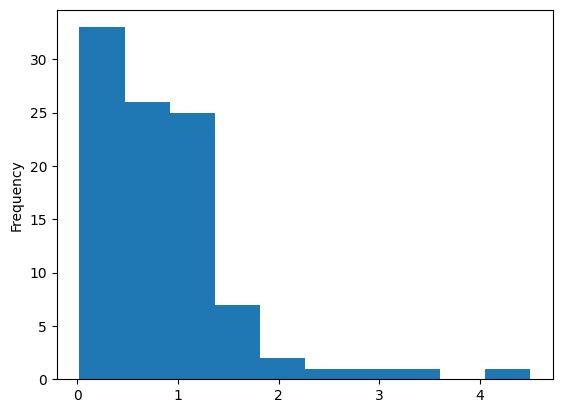

In [87]:
error_ratio.plot.hist()

If the user wants to make predictions on countries that won a lot of medals... The model would do pretty well because the errors are pretty low.

In [88]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

But for other countries where there isn't enough data or not sending a lot of athletes to the Olympics... The error would be much higher.

In conclusion, if a country sends a lot of athletes to the Olympics, then the model will perform well.

### Next Steps: Extend the Model?
- Improve the accuracy and performance

- Add in more predictors such as events, age, or height
- Try different models such as random forest or a neural network
- Build a specific athlete level model to help the general model
- Reshape the model using mathematical correlations
- Measure the error more predictably like building a back testing system or measuring error across the whole data set, not just on a 20 subset of it
- Train a model for different types of countries for countries that earn low number of medals versus high number of medals, etc.